In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import mpld3
import mpld3.plugins as plugins
from datetime import datetime

In [24]:
df = pd.read_csv("../../datasets/binance-bitcoin-h.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Close Time'] = pd.to_datetime(df['Close Time'], format='mixed').dt.strftime('%Y-%m-%d %H:%M:%S')
df['Close Time'] = pd.to_datetime(df['Close Time'], format='%Y-%m-%d %H:%M:%S')

<h3>
<b>
Фильтрация DF
<b>
<h3>

In [25]:
start_date = pd.to_datetime('2023-10-25')
end_date = pd.to_datetime('2023-11-09')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

<h3>
<b>
Функция для конвертации 15-и минутного тайм фрейма в более старший
</b>
</h3>

In [26]:
def binanceConvert(time_frame, path_to_df=None, data_frame=None, start_time_frame="15m", save_to_csv=False):
    if path_to_df is None:
        if data_frame is not None:
            cdf = data_frame.copy()
        else:
            print("no path to df and no df. WTF?")
            return 0
    elif path_to_df is not None and data_frame is None:
        cdf = pd.read_csv(path_to_df).copy()
    else:
        print("path to df and df. WTF?")
        return 0

    cdf['Date'] = pd.to_datetime(cdf['Date'])
    cdf.set_index('Date', inplace=True)

    resampled_df = cdf.resample(time_frame).agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum',
        'Close Time': 'last',
        'Quote Asset Volume': 'sum',
        'Number of Trades': 'sum',
        'Taker Buy Base Asset Volume': 'sum',
        'Taker Buy Quote Asset Volume': 'sum'
    })
    if save_to_csv:
        file_path = f"binance-bitcoin-{time_frame}.csv"
        resampled_df.reset_index().to_csv(file_path, index=False)
    else:
        return resampled_df.reset_index()

In [36]:
# РАБОТАЕТ НА 15m НЕ РАБОТАЕТ НА ЧАСЕ
def localATH():
    TMP_ATH_1 = 0
    TMP_ATH_2 = 0
    TMP_ATH_1_TIME = filtered_df["Date"][filtered_df.index[0]]
    TMP_ATH_2_TIME = filtered_df["Date"][filtered_df.index[0]]
    TMP_ATL_1 = 99999999
    TMP_ATL_2 = 99999999
    TMP_ATL_1_TIME = filtered_df["Date"][filtered_df.index[0]]
    TMP_ATL_2_TIME = filtered_df["Date"][filtered_df.index[0]]
    for i in range(filtered_df.index[0], filtered_df.index[-1]-1):
        current_price = filtered_df["Close"][i]
        current_time = filtered_df["Date"][i]
        if current_price >= TMP_ATH_1:
            TMP_ATH_1 = current_price
            TMP_ATH_1_TIME = current_time
        if current_price > TMP_ATH_2 and current_price != TMP_ATH_1:
            TMP_ATH_2 = current_price
            TMP_ATH_2_TIME = current_time
    AVG_TMP_ATH = (TMP_ATH_1 + TMP_ATH_2) / 2
    AVG_TMP_ATH_TIME = (datetime.fromtimestamp((TMP_ATH_1_TIME.timestamp() + TMP_ATH_2_TIME.timestamp()) / 2)).strftime("%Y-%m-%d %H:%M:%S")

    start = (filtered_df.loc[filtered_df["Date"] == TMP_ATH_1_TIME]).index[0]
    middle = (filtered_df.loc[filtered_df["Date"] == AVG_TMP_ATH_TIME]).index[0]
    end = (filtered_df.loc[filtered_df["Date"] == TMP_ATH_2_TIME]).index[0]

    for i in range(start, middle):
        current_price = filtered_df["Close"][i]
        current_time = filtered_df["Date"][i]

        if current_price <= TMP_ATL_1:
            TMP_ATL_1 = current_price
            TMP_ATL_1_TIME = current_time

    for i in range(middle, end):
        current_price = filtered_df["Close"][i]
        current_time = filtered_df["Date"][i]

        if current_price < TMP_ATL_2 and current_price != TMP_ATL_1:
            TMP_ATL_2 = current_price
            TMP_ATL_2_TIME = current_time

    return {'local_ath_1':[TMP_ATH_1, TMP_ATH_1_TIME], 'local_ath_2':[TMP_ATH_2, TMP_ATH_2_TIME], 'local_atl_1':[TMP_ATL_1, TMP_ATL_1_TIME], 'local_atl_2':[TMP_ATL_2, TMP_ATL_2_TIME], 'local_avg':[AVG_TMP_ATH, AVG_TMP_ATH_TIME]}
    # print(TMP_ATH_1, TMP_ATH_1_TIME)
    # print(TMP_ATH_2, TMP_ATH_2_TIME)
    # print(TMP_ATL_1, TMP_ATL_1_TIME)
    # print(TMP_ATL_2, TMP_ATL_2_TIME)
    # print(AVG_TMP_ATH, AVG_TMP_ATH_TIME)

In [37]:
# consol = localATH()
# for i in consol:
#     print(pd.Timestamp(dicttt.get(i)[1]).strftime('%Y-%m-%d %H:%M:%S'))
#     # print(i)

# print(pd.Timestamp(consol.get('local_ath_1')[1]).strftime('%Y-%m-%d %H:%M:%S'),
#                            pd.Timestamp(consol.get('local_ath_2')[1]).strftime('%Y-%m-%d %H:%M:%S'),
#                            pd.Timestamp(consol.get('local_atl_1')[1]).strftime('%Y-%m-%d %H:%M:%S'),
#                            pd.Timestamp(consol.get('local_atl_2')[1]).strftime('%Y-%m-%d %H:%M:%S'),
#                            pd.Timestamp(consol.get('local_avg')[1]).strftime('%Y-%m-%d %H:%M:%S'))

filtered_df
localATH()

{'local_ath_1': [35678.85, Timestamp('2023-11-02 05:00:00')],
 'local_ath_2': [35621.99, Timestamp('2023-11-08 22:00:00')],
 'local_atl_1': [33595.62, Timestamp('2023-10-27 21:00:00')],
 'local_atl_2': [33600.15, Timestamp('2023-10-27 20:00:00')],
 'local_avg': [35650.42, '2023-11-05 16:30:00']}

<h3>
<b>
Отрисовка графика цены Close
</b>
</h3>

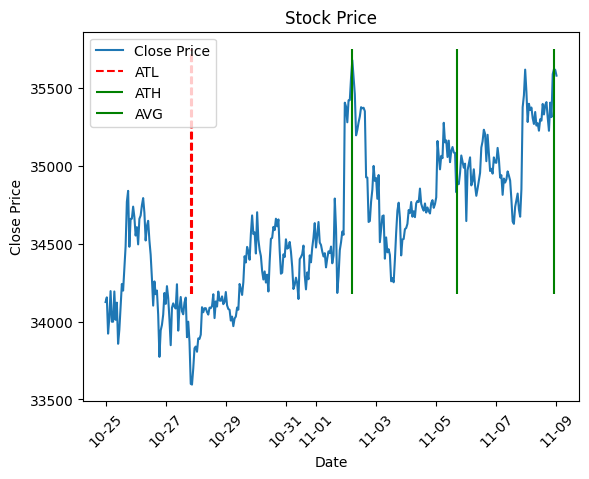

In [38]:
consol = localATH()

date_formatter = mdates.DateFormatter('%m-%d')

plt.gca().xaxis.set_major_formatter(date_formatter)

plt.plot(filtered_df['Date'], filtered_df['Close'], label='Close Price')

# Вертикальные прерывистые линии
plt.vlines(pd.to_datetime([pd.Timestamp(consol.get('local_atl_1')[1]).strftime('%Y-%m-%d %H:%M:%S'),
                           pd.Timestamp(consol.get('local_atl_2')[1]).strftime('%Y-%m-%d %H:%M:%S')]),
           ymin=34174.19, ymax=35753.83, colors='red', linestyles='dashed', label='ATL')

plt.vlines(pd.to_datetime([pd.Timestamp(consol.get('local_ath_1')[1]).strftime('%Y-%m-%d %H:%M:%S'),
                           pd.Timestamp(consol.get('local_ath_2')[1]).strftime('%Y-%m-%d %H:%M:%S')]),
           ymin=34174.19, ymax=35753.83, colors='green', label='ATH')

plt.vlines(pd.to_datetime([pd.Timestamp(consol.get('local_avg')[1]).strftime('%Y-%m-%d %H:%M:%S')]),
           ymin=34174.19, ymax=35753.83, colors='green', label='AVG')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price')
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [ ]:
# with open("../../datasets/h/binance-bitcoin-h.csv", "w") as file:
#     file.write((binanceConvert("w", df)).to_csv())

print(binanceConvert("4h", data_frame = df))

                     Date      Open      High       Low     Close  \
0     2017-08-17 04:00:00   4261.48   4313.62   4261.32   4308.83   
1     2017-08-17 08:00:00   4308.83   4377.85   4287.41   4360.69   
2     2017-08-17 12:00:00   4360.00   4485.39   4360.00   4411.00   
3     2017-08-17 16:00:00   4411.00   4485.39   4255.30   4354.18   
4     2017-08-17 20:00:00   4354.18   4354.84   4200.74   4346.74   
...                   ...       ...       ...       ...       ...   
13669 2023-11-12 08:00:00  37006.00  37171.10  36946.60  37095.84   
13670 2023-11-12 12:00:00  37095.85  37132.36  36963.00  37007.36   
13671 2023-11-12 16:00:00  37007.35  37222.22  36931.10  37109.99   
13672 2023-11-12 20:00:00  37110.00  37200.00  37051.95  37131.98   
13673 2023-11-13 00:00:00  37131.98  37193.83  37131.98  37157.31   

            Volume          Close Time  Quote Asset Volume  Number of Trades  \
0        47.181009 2017-08-17 07:59:59        2.023661e+05               171   
1        35

---

In [ ]:
def moving_avg (x, n):
    return pd.Series(x).rolling(window=n).mean().iloc[n-1:].values

print(len(moving_avg(filtered_df["Close"], 16)))
print(filtered_df["Close"])

754
217711    34598.60
217712    34596.93
217713    34538.47
217714    34475.98
217715    34507.70
            ...   
218475    35731.63
218476    35614.43
218477    35570.64
218478    35616.93
218479    35598.00
Name: Close, Length: 769, dtype: float64


In [ ]:
# НАХОЖДЕНИЕ ATH и ATL на промежутке


TMP_ATH_1 = 0
TMP_ATH_2 = 0
TMP_ATH_1_TIME = filtered_df["Date"][filtered_df.index[0]]
TMP_ATH_2_TIME = filtered_df["Date"][filtered_df.index[0]]

TMP_ATL_1 = 99999999
TMP_ATL_2 = 99999999
TMP_ATL_1_TIME = filtered_df["Date"][filtered_df.index[0]]
TMP_ATL_2_TIME = filtered_df["Date"][filtered_df.index[0]]

for i in range(filtered_df.index[0], filtered_df.index[-1]-1):
    current_price = filtered_df["Close"][i]
    current_time = filtered_df["Date"][i]
    if current_price >= TMP_ATH_1:
        TMP_ATH_1 = current_price
        TMP_ATH_1_TIME = current_time
    if current_price > TMP_ATH_2 and current_price != TMP_ATH_1:
        TMP_ATH_2 = current_price
        TMP_ATH_2_TIME = current_time
        
    if current_price <= TMP_ATL_1:
        TMP_ATL_1 = current_price
        TMP_ATL_1_TIME = current_time
    if current_price < TMP_ATL_2 and current_price != TMP_ATL_1:
        TMP_ATL_2 = current_price
        TMP_ATL_2_TIME = current_time
print(TMP_ATH_1, TMP_ATH_1_TIME)
print(TMP_ATH_2, TMP_ATH_2_TIME)
print(TMP_ATL_1, TMP_ATL_1_TIME)
print(TMP_ATL_2, TMP_ATL_2_TIME)
ATH_1_TIME = TMP_ATH_1_TIME
ATL_1_TIME = TMP_ATL_1_TIME
ATH_2_TIME = TMP_ATH_2_TIME
ATL_2_TIME = TMP_ATL_2_TIME

35753.83 2023-11-02 06:00:00
35731.63 2023-11-08 23:00:00
34174.19 2023-11-03 13:00:00
34190.42 2023-11-03 15:00:00


In [ ]:
#TODO: НУЖНО НАЙТИ СРЕДНЮЮ ДАТУ МЕЖДУ ATH_1 и ATL_1 + для ATH_2 и ATL_2
#TODO: Построить эти точки на графике

ath_1_time_int = int((pd.Timestamp(ATH_1_TIME)).timestamp())
ath_2_time_int = int((pd.Timestamp(ATH_2_TIME)).timestamp())
atl_1_time_int = int((pd.Timestamp(ATL_1_TIME)).timestamp())
atl_2_time_int = int((pd.Timestamp(ATL_2_TIME)).timestamp())

point1_int = (ath_1_time_int + atl_1_time_int) / 2
point2_int = (ath_2_time_int + atl_2_time_int) / 2

point1_timestamp = datetime.datetime.fromtimestamp(point1_int).strftime('%Y-%m-%d %H:%M:%S')
point2_timestamp = datetime.datetime.fromtimestamp(point2_int).strftime('%Y-%m-%d %H:%M:%S')

# print(point1_timestamp)
# print(point2_timestamp)
print(atl_1_time_int - atl_2_time_int)
print(ath_1_time_int - ath_2_time_int)

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [ ]:
for i in range(filtered_df.index[0], filtered_df.index[-1]-1):
    current_price = filtered_df["Close"][i]
    current_time = filtered_df["Date"][i]
    if current_price >= TMP_ATH_1:
        TMP_ATH_1 = current_price
        TMP_ATH_1_TIME = current_time
    if current_price > TMP_ATH_2 and current_price != TMP_ATH_1:
        TMP_ATH_2 = current_price
        TMP_ATH_2_TIME = current_time

    if current_price <= TMP_ATL_1:
        TMP_ATL_1 = current_price
        TMP_ATL_1_TIME = current_time
    if current_price < TMP_ATL_2 and current_price != TMP_ATL_1:
        TMP_ATL_2 = current_price
        TMP_ATL_2_TIME = current_time